## URL : "https://api.teleport.org/api/urban_areas" & API name : 'Teleport'

**Research Question :** What are the top 20 highest paying professional occupations at 50th percentile around the major economics cities all over the world? Also, what is the most dominant occupation from those top 20 highest paying job categories ?

**Benefit**: Individuals who are yet to fix their career path or their job location for reaching the pinaccle of their profession and job reward can have some suggestions from this research although this dataset cannot provide all the different aspects one needs to have a final career choice or location (i.e. job security, job satisfaction etc.) This can also be helpful to researchers who are trying to understand the job salary dynamics in different regions of the world.

# Solution code :

Number of cities= 266
Number of jobs in each cities= 52

Top 1 Highest Paying Job:
{'city': 'Riyadh, Saudi Arabia',
 'job': {'id': 'C-LEVEL-EXECUTIVE', 'title': 'C Level Executive'},
 'salary_percentiles': {'percentile_25': 178154.12143595336,
                        'percentile_50': 295000.1356284144,
                        'percentile_75': 488481.99143160717}}

Top 2 Highest Paying Job:
{'city': 'Hong Kong, Hong Kong',
 'job': {'id': 'C-LEVEL-EXECUTIVE', 'title': 'C Level Executive'},
 'salary_percentiles': {'percentile_25': 129647.64522071916,
                        'percentile_50': 220831.0754958616,
                        'percentile_75': 376145.3886928407}}

Top 3 Highest Paying Job:
{'city': 'Phuket, Thailand',
 'job': {'id': 'C-LEVEL-EXECUTIVE', 'title': 'C Level Executive'},
 'salary_percentiles': {'percentile_25': 144943.65367976972,
                        'percentile_50': 215158.04267311393,
                        'percentile_75': 319386.0659067047}}

Top 4 Highest Payi

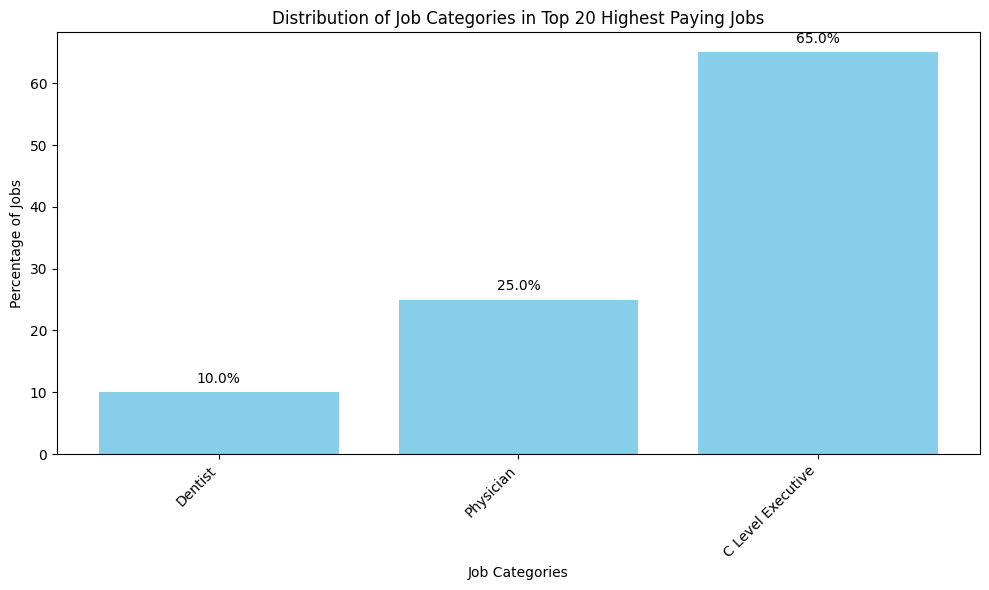

In [ ]:
import requests
from pprint import pprint

import requests
from pprint import pprint

import requests
import json

url = "https://api.teleport.org/api/urban_areas"
response = requests.get(url)



import json
import matplotlib.pyplot as plt


from collections import defaultdict
response.reason

from pprint import pprint

#pprint(response.json())

type(response.json())

json_data=response.json()

# # type(json_data['prizes'])

# pprint(json_data['_links'])

city_count=len(json_data['_links']['ua:item'])


new_url=json_data['_links']['ua:item'][1]['href']

new_response=requests.get(new_url)

json_data_new=new_response.json()

# pprint(json_data_new)

new_url_2=json_data_new['_links']['ua:salaries']['href']

new_response=requests.get(new_url_2)

json_data_new_2=new_response.json()

#print(new_url_2)

# pprint(json_data_new_2)

job_count=len(json_data_new_2['salaries'])

print("Number of cities= "+ str(city_count) )


print("Number of jobs in each cities= "+ str(job_count) )


cities_url = json_data['_links']['ua:item']
highest_paying_jobs = []

for city_link in cities_url:
    # Access the city URL
    city_response = requests.get(city_link['href'])
    json_data_city = city_response.json()

    # Access the salaries URL for the city
    salaries_url = json_data_city['_links']['ua:salaries']['href']
    salaries_response = requests.get(salaries_url)
    json_data_salaries = salaries_response.json()

    # Extract job salary
    jobs = json_data_salaries['salaries']

    # highest paying job at the 50th percentile
    highest_paying_job = max(jobs, key=lambda job: job['salary_percentiles']['percentile_50'])

    # Add city information to the job salary
    highest_paying_job['city'] = json_data_city['full_name']  # Update this line to access the correct city information

    #  result added to list
    highest_paying_jobs.append(highest_paying_job)

# Sort list of highest paying jobs
sorted_highest_paying_jobs = sorted(highest_paying_jobs, key=lambda job: job['salary_percentiles']['percentile_50'], reverse=True)

#  top 20 highest paying jobs along with city name and other percentiles
for idx, job_info in enumerate(sorted_highest_paying_jobs[:20], 1):
    print(f"\nTop {idx} Highest Paying Job:")
    pprint(job_info)

import matplotlib.pyplot as plt

# Extract job categories from the top 20 highest paying jobs
job_categories = [job['job']['title'] for job in sorted_highest_paying_jobs[:20]]

# Count the occurrences of each job category
job_category_counts = {category: job_categories.count(category) for category in set(job_categories)}

# Calculate the percentage
total_jobs = len(job_categories)
job_category_percentages = {category: count / total_jobs * 100 for category, count in job_category_counts.items()}


plt.figure(figsize=(10, 6))
plt.bar(job_category_percentages.keys(), job_category_percentages.values(), color='skyblue')
plt.xlabel('Job Categories')
plt.ylabel('Percentage of Jobs')
plt.title('Distribution of Job Categories in Top 20 Highest Paying Jobs')
plt.xticks(rotation=45, ha='right')


for category, percentage in job_category_percentages.items():
    plt.text(category, percentage + 1, f"{percentage:.1f}%", ha='center', va='bottom')

plt.tight_layout()


plt.show()


#**Discussion** :

The API entailing with urban areas contains information from 266 cities and has recorded the salary information of about 52 different type of professions for each of those cities. The top 20 paying jobs across all over the cities were identified and appended to a list with their relevant city information and other percentile salaries. They were sorted and printed in decremental order ranking from highest to lowest paying top 20 salary at 50th percentile to understand the salary distribution in different occupations in major cities around the world. After ranking, the top-3 highest paying job were found at countries named "Saudi-Arabia", "Hong-Kong" and "Thailand" resoectively as a "C-level Executive" which belong to professions such as CEO,CTO,CFO etc. From the top 20 ranked jobs, a barchart was plotted to understand the job distribution over various job categories. It was found that only 3 job categories consisted all the top-20 paying occupations at 50th percentile. 65% of those jobs belonged to "C-level-executive" and the rest belonged to medical professionals like "Dentis" and "Physicians"

# URL :https://api.weather.gov/points/37.23,-80.43 & API name : US Weather

**Research Question** : How does the weather temperature vary in my home location forecast of next 7 days? Explore the relationship among temperature, wind-speed and humidity for day and night time from the weather forecast of my home.

**Benefit**: This will help someone to understand how to extract the weather forecast for the upcoming 7 dates with both day and night time given they know their location longiture and latitude. Moreover, the relationship demonstration can be helpful for meterolocial research students along with general people to understand about causal-effects of the weather status.

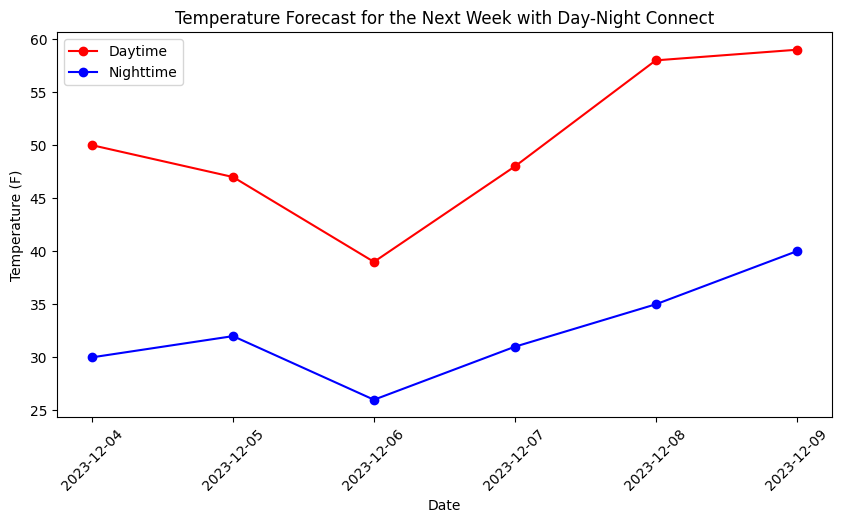

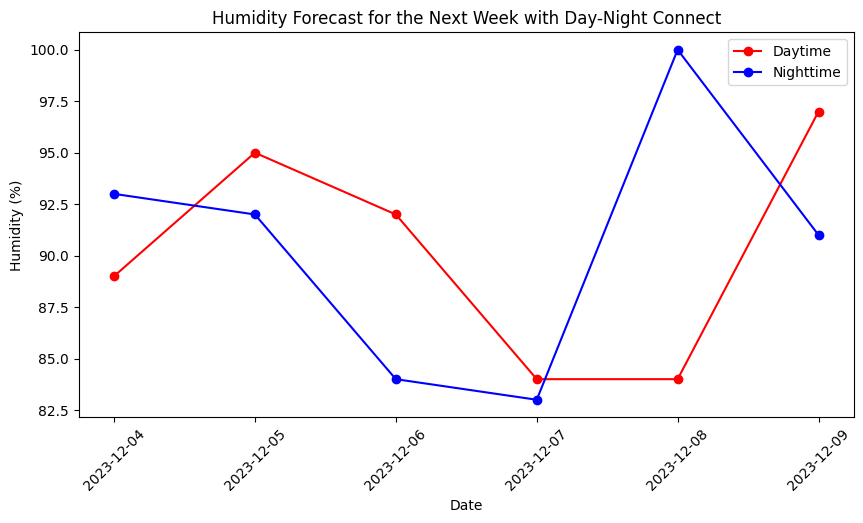

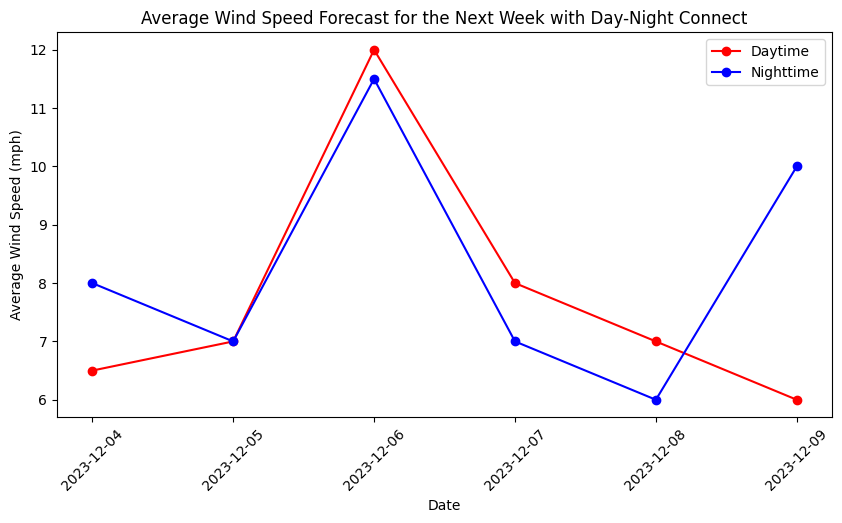

In [ ]:
import matplotlib.pyplot as plt
import datetime

import requests
import json

url = " https://api.weather.gov/points/37.23,-80.43"
response = requests.get(url)

response.reason

import json
import matplotlib.pyplot as plt


from collections import defaultdict


#nw
from pprint import pprint

#pprint(response.json())

type(response.json())

json_data=response.json()

# type(json_data['prizes'])

json_data

forecast = json_data['properties']['forecast']

forecast
# json_data['prizes'][0]
# len(json_data['prizes'][0]['laureates'])

#nw


new_url = forecast
response_2 = requests.get(new_url)

response_2.reason

type(response_2.json())

my_forecast=response_2.json()

# pprint(my_forecast)




periods = my_forecast['properties']['periods']

periods = periods[1:13]

# Lists to store data for plotting
dates = []
temperature = []
humidity = []
wind_speed = []
daytime_periods = []

# Extracting data for each period
for period in periods:
    # Extract date and time
    start_time = datetime.datetime.fromisoformat(period['startTime'])
    end_time = datetime.datetime.fromisoformat(period['endTime'])
    date_str = start_time.strftime('%Y-%m-%d')

    # Extracting temperature, humidity, and wind speed
    temperature.append(period['temperature'])
    humidity.append(period['relativeHumidity']['value'])

    # Calculate average wind speed if there are two values
    wind_speed_str = period['windSpeed']
    if wind_speed_str is not None:
        wind_speed_values = [int(speed) for speed in wind_speed_str.split() if speed.isdigit()]
        if len(wind_speed_values) > 1:
            avg_wind_speed = sum(wind_speed_values) / len(wind_speed_values)
            wind_speed.append(avg_wind_speed)
        else:
            wind_speed.append(wind_speed_values[0] if wind_speed_values else 0)
    else:
        wind_speed.append(0)

    dates.append(date_str)

    # Check if it's daytime
    is_daytime = period['isDaytime']
    daytime_periods.append(is_daytime)

# Plotting temperature with lines connecting day and night points
plt.figure(figsize=(10, 5))
day_x = [date for date, is_daytime in zip(dates, daytime_periods) if is_daytime]
day_y = [temp for temp, is_daytime in zip(temperature, daytime_periods) if is_daytime]
night_x = [date for date, is_daytime in zip(dates, daytime_periods) if not is_daytime]
night_y = [temp for temp, is_daytime in zip(temperature, daytime_periods) if not is_daytime]

plt.plot(day_x, day_y, marker='o', color='red', label='Daytime')
plt.plot(night_x, night_y, marker='o', color='blue', label='Nighttime')
plt.title('Temperature Forecast for the Next Week with Day-Night Connect')
plt.xlabel('Date')
plt.ylabel('Temperature (F)')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Plotting humidity with lines connecting day and night points
plt.figure(figsize=(10, 5))
day_x = [date for date, is_daytime in zip(dates, daytime_periods) if is_daytime]
day_y = [hum for hum, is_daytime in zip(humidity, daytime_periods) if is_daytime]
night_x = [date for date, is_daytime in zip(dates, daytime_periods) if not is_daytime]
night_y = [hum for hum, is_daytime in zip(humidity, daytime_periods) if not is_daytime]

plt.plot(day_x, day_y, marker='o', color='red', label='Daytime')
plt.plot(night_x, night_y, marker='o', color='blue', label='Nighttime')
plt.title('Humidity Forecast for the Next Week with Day-Night Connect')
plt.xlabel('Date')
plt.ylabel('Humidity (%)')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Plotting average wind speed with lines connecting day and night points
plt.figure(figsize=(10, 5))
day_x = [date for date, is_daytime in zip(dates, daytime_periods) if is_daytime]
day_y = [speed for speed, is_daytime in zip(wind_speed, daytime_periods) if is_daytime]
night_x = [date for date, is_daytime in zip(dates, daytime_periods) if not is_daytime]
night_y = [speed for speed, is_daytime in zip(wind_speed, daytime_periods) if not is_daytime]

plt.plot(day_x, day_y, marker='o', color='red', label='Daytime')
plt.plot(night_x, night_y, marker='o', color='blue', label='Nighttime')
plt.title('Average Wind Speed Forecast for the Next Week with Day-Night Connect')
plt.xlabel('Date')
plt.ylabel('Average Wind Speed (mph)')
plt.xticks(rotation=45)
plt.legend()
plt.show()


# Discussion :

Since the API contained information about the weather status for upcoming 7 days days with 12 hour interval in their 'forecast' url starting from 'number':1 to 14 where 1 and 2 meant first date day and night time respectively and so on, all the infos were collected in separate lists in chronological order according to their 'number' and the date stamp was also collected ub (year-month-date) format which were later used for plotting.


From the temperature plot it is evident that the temperature of my home location will vary between [60,25] maximum range. The day time in general should have higher temperature compared to night time.

From the relationship, it can be noted that on December-6th the wind speed should be highest, whereas the temperature should be lowest from all the 7 days in both day and night wather status. In general, it can also be noted that during day time, if wind-speed is low then temperature goes high for all the dates and vice-versa. Proving wind-speed as a significant factor of temperature change in daytime.

From the comparison of humidity and wind-speed curve, it is observed that there exists reciprocal relationship between wind-speed and humidity factor. If windspeed increases, humidity in general decreases and vice-versa for the opposite case.

It can also be noted from the humidity curve, that the change in humidity percentage at night time is more sharp than change in humidity during day time for the next 7 day forecast.

# URL :https://pokeapi.co/api/v2/pokedex & API name : Pokeapi

**Research Question**: From all the games that have been published from pokemon franchise, how many unique pokemons were introduced ? Is there any pattern between the release of later gaming versions and the number of pokemons introduced in each version ?

**Benefit**: This question will help the anime-game sereis franchises to have a brief idea of how pokemon gaming franchises function. Moreover, it will also be a useful information for the pokemon-fanbase and fan-bloggers.

The  number of total unique pokemon across all the games
1017


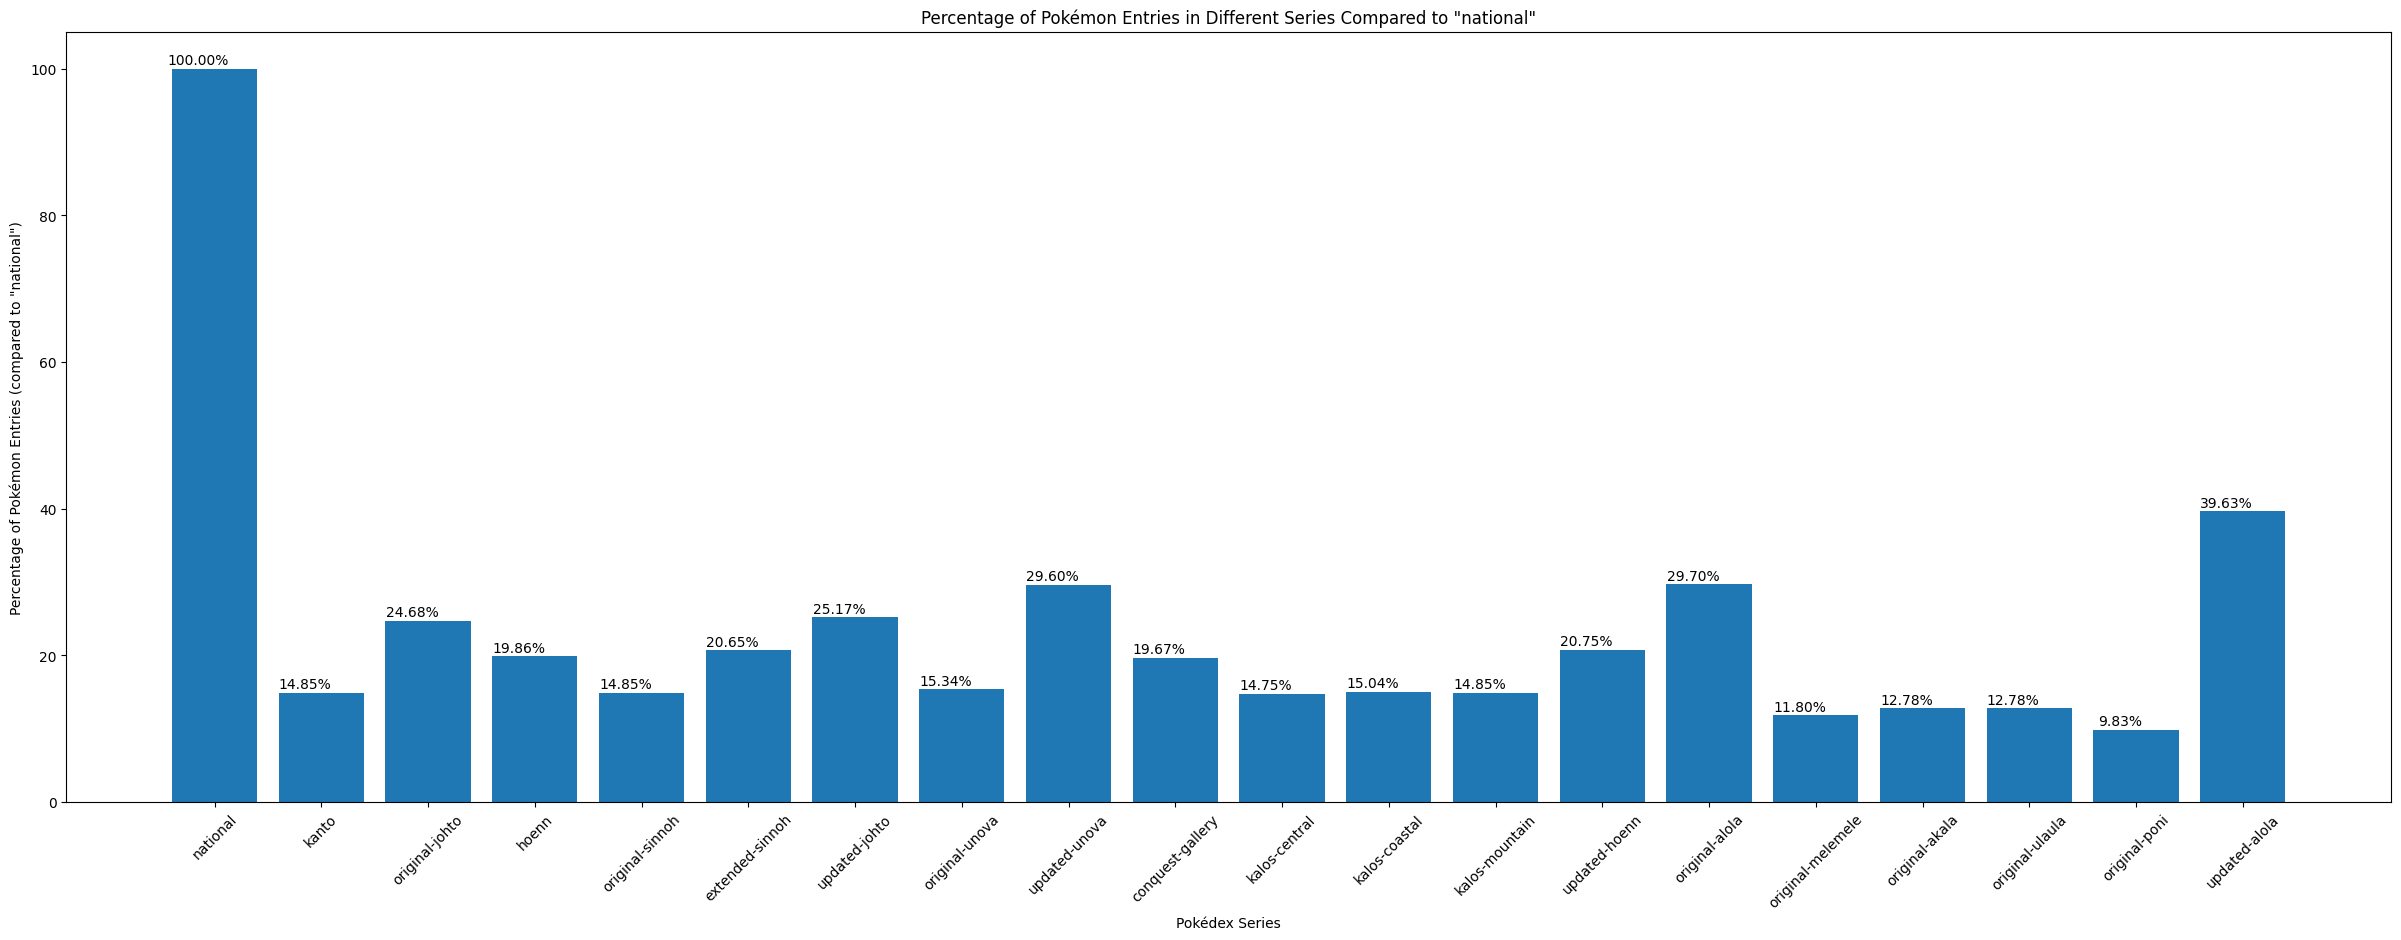

In [ ]:
import requests
import json

url = " https://pokeapi.co/api/v2/pokedex"
response = requests.get(url)



import json
import matplotlib.pyplot as plt


from collections import defaultdict
response.reason

from pprint import pprint

#pprint(response.json())

type(response.json())

json_data=response.json()

# # type(json_data['prizes'])

# print(len(json_data['results']))

# pprint(json_data['results'])

new_url=json_data['results'][0]['url']

new_response=requests.get(new_url)

json_data_new=new_response.json()

# pprint(json_data_new['pokemon_entries'])

print("The  number of total unique pokemon across all the games")
pprint(len(json_data_new['pokemon_entries']))


import requests
import matplotlib.pyplot as plt

# list of dictionaries
pokedex_list = json_data['results']

# Function to fetch the number of Pokémon entries for a given URL
def get_pokemon_entries(url):
    response = requests.get(url)
    data = response.json()
    return len(data['pokemon_entries'])

# Fetch the data for each series
entries_data = []
national_count = get_pokemon_entries(pokedex_list[0]['url'])  # 'national' series count

for series in pokedex_list:
    entries_count = get_pokemon_entries(series['url'])
    percentage_of_national = (entries_count / national_count) * 100
    entries_data.append({'name': series['name'], 'percentage': percentage_of_national})

# Plot the data in a bar plot with labels
names = [entry['name'] for entry in entries_data]
percentages = [entry['percentage'] for entry in entries_data]

plt.figure(figsize=(30, 10))
bars = plt.bar(names, percentages)
plt.xlabel('Pokédex Series')
plt.ylabel('Percentage of Pokémon Entries (compared to "national")')
plt.xticks(rotation=45)
plt.title('Percentage of Pokémon Entries in Different Series Compared to "national"')

# Add labels to each bar with their respective percentage values
for bar, percentage in zip(bars, percentages):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.2,
             f'{percentage:.2f}%', ha='center', va='bottom')

plt.show()


# **Discussion** : (Click the above plot for zooming in)

The different regions inside the pokedex url were accessed using by using their individual urls of the respective regions under 'results' list and the number of pokemon entries for different regions which was equivalent to the length of the list of 'pokemon_entries' under the urls of different regions were collected. Finally after all the processing, the total number of unique pokemon characters in all the game sereis was printed and the percentage of the introduced pokemon from the total number of unique pokemon counts were also plotted with their respective gaming sereis names in chronological order where the older one is plotted earlier and later sereis are plotted later to right side.

It was observed that around **1017** number of total pokemon characters have been introduced so far in all the gaming sereis named in the plot labels. It was also observed that for every region of the game sereis, the updated version contained more introduction of pokemons against the original version. The Aloha region introduced highest number of pokemons about 29.7% as against to all the other original regional sereis. Consequently, the updated version of Aloha region introduced the highest amount of pokemon characters of about 39.63% among all the sereis so far released.

Among all the original sereis, the introduction of pokemon characters were varying and so no specific pattern was observed in that case.




# URL : http://api.nobelprize.org/v1/prize.json & API name : Nobel Prize

**Research Question** : What is the pattern of nobel prize distribution of Economics and Literature category after 1950s? Did the number of nobel prize distributions in those categories change or did they remain same?

**Why Interesting** : As a Bangladeshi person and a Bengali speaker, I have studied about the only four Nobel laureates who were Bengali speaking. Two of them got the Nobel prize in Economic Sciencce whereas one famous poet got it in literature. That is why I want to see the number of nobel prize distributed in each year in those categories. It will be interesting information to Bengali speaking audiences.

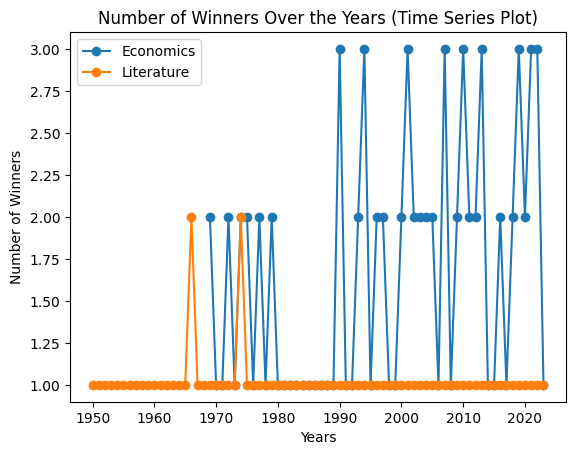

In [ ]:
import requests
import json
import matplotlib.pyplot as plt

from pprint import pprint

url = "http://api.nobelprize.org/v1/prize.json"
response = requests.get(url)

json_data = response.json()


#pprint(response.json())

type(response.json())

json_data=response.json()

type(json_data['prizes'])



# json_data['prizes'][0]
# len(json_data['prizes'][0]['laureates'])


# Separate data for literature and economics
literature_data = {}
economics_data = {}


# for entry in json_data['prizes']:
#     if entry['category'] == 'physics':
#         year = int(entry['year'])
#         if year >= 1950:
#             num_winners = len(entry['laureates'])
#             literature_data[year] = num_winners
#             print(f"Year: {year}, Number of Winners: {num_winners}")

# physics_years = list(literature_data.keys())
# physics_winners = list(literature_data.values())


# for entry in json_data['prizes']:
#     if entry['category'] == 'chemistry':
#         year = int(entry['year'])
#         if year >= 1950:
#             num_winners = len(entry['laureates'])
#             literature_data[year] = num_winners
#             print(f"Year: {year}, Number of Winners: {num_winners}")

# chemistry_years = list(literature_data.keys())
# chemistry_winners = list(literature_data.values())


# for entry in json_data['prizes']:
#     if entry['category'] == 'medicine':
#         year = int(entry['year'])
#         if year >= 1950:
#             num_winners = len(entry['laureates'])
#             literature_data[year] = num_winners
#             print(f"Year: {year}, Number of Winners: {num_winners}")

# medicine_years = list(literature_data.keys())
# medicine_winners = list(literature_data.values())


# for entry in json_data['prizes']:
#     if entry['category'] == 'peace':
#         year = int(entry['year'])
#         if year >= 1970:
#             num_winners = len(entry['laureates'])
#             literature_data[year] = num_winners
#             print(f"Year: {year}, Number of Winners: {num_winners}")


# peace_years = list(literature_data.keys())
# peace_winners = list(literature_data.values())

for entry in json_data['prizes']:
    if entry['category'] == 'literature':
        year = int(entry['year'])
        if year >= 1950:
            num_winners = len(entry['laureates'])
            literature_data[year] = num_winners

    elif entry['category'] == 'economics':
        year = int(entry['year'])
        if year >= 1950:
            num_winners = len(entry['laureates'])
            economics_data[year] = num_winners


# Plot the data for economics
economics_years = list(economics_data.keys())
economics_winners = list(economics_data.values())
plt.plot(economics_years, economics_winners, marker='o', label='Economics')


# Plot the data for literature
literature_years = list(literature_data.keys())
literature_winners = list(literature_data.values())
plt.plot(literature_years, literature_winners, marker='o', label='Literature')

# Add legends
plt.legend()

plt.xlabel('Years')
plt.ylabel('Number of Winners')
plt.title('Number of Winners Over the Years (Time Series Plot)')
plt.show()


# **Discussion** :

Under the 'prizes' list of the url, each item of the list contained a dictionary which consisted information about the nobel prize winners in each category of a respective year. For the years after 1950, the length of the 'laureates' list inside each dictionary was recorded for only 'literature' and 'economics'. The mentioned length value were equivalent to the number of nobel prize distribution of that category in the respective year. The number of winners in those two categories were listed against their respective years and were plotted later for understanding the pattern.

From the plot it can be observed that the number of literature prize distribution almost remained constant as a single prize winner were announced every year except two occassions after 1950s. For the economics award, it can be seen that from about 1950 to 1965, there were almost no award given in that sector. But after 1990s the distribution variation increased in economics section, ranging from 1 to even 3 for a year. That explains why both Bengali economics Nobel prize winner Amartya Sen and Abhijit Banerjee won it in 1998 and 2019 respectively and why it is so hard for another Bengali  poet writer yet to get another Nobel prize after "Rabindranath Tagore" as the Nobel prize ditribution in 'literature' is very strict.

